In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [7]:
df_ratings=pd.read_csv("./data/u.data", sep="\t")
df_ratings.columns=["UserID","ItemID", "Rating", "Timestamp"]

for i in range (0, len(df_ratings)):
    df_ratings["Timestamp"][i]=datetime.utcfromtimestamp(df_ratings["Timestamp"][i]).strftime('%Y-%m-%d %H:%M:%S')
df_ratings.sort_values("ItemID")

df_ratings

,UserID,ItemID,Rating,Timestamp
0,186,302,3,1998-04-04 19:22:22
1,22,377,1,1997-11-07 07:18:36
2,244,51,2,1997-11-27 05:02:03
3,166,346,1,1998-02-02 05:33:16
4,298,474,4,1998-01-07 14:20:06
...,...,...,...,...
99994,880,476,3,1997-11-22 05:10:44
99995,716,204,5,1997-11-17 19:39:03
99996,276,1090,1,1997-09-20 22:49:55
99997,13,225,2,1997-12-17 22:52:36


In [14]:
dfMovies=pd.read_csv("./data/u.item", sep="|", encoding='latin-1', header=None)
dfMovies.rename(columns = {'1':'ItemID'}, inplace = True)
#df2.drop("Unnamed: 3", axis=1)
dfGenre=pd.read_csv("./data/u.genre", sep="|")
listGenres=["ItemID","movie title", "releaseDate", "video release date", "IMDb URL",'unknown']

for i in range(0,len(dfGenre)):
    listGenres.append(dfGenre["unknown"][i])
dfMovies.columns=listGenres

dfMovies=dfMovies.drop(["IMDb URL","video release date"], axis=1)
dfMovies.releaseDate=pd.to_datetime(dfMovies.releaseDate)
dfMovies.releaseDate = pd.DatetimeIndex(dfMovies.releaseDate).year
dfMovies.rename(columns={'releaseDate':'ReleaseYear'}, inplace=True)
dfMovies=dfMovies.dropna()
dfMovies['ReleaseYear'] = dfMovies['ReleaseYear'].astype(int)


In [18]:
dfUsers=pd.read_csv("./data/u.user", sep="|", header=None)
dfUsers.columns=["UserID","Age", "Gender", "Occupation", "Zip code"]

Text(0.5, 1.0, 'Rating')

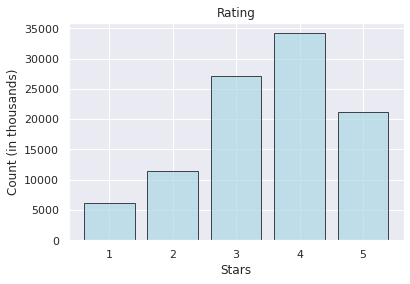

In [19]:
# Bar chart to view distribution of ratings accross all movies
x = df_ratings.Rating.value_counts().index    #Values for x-axis
y = [df_ratings['Rating'].value_counts()[i] for i in x]   #count(in thousands) on y-axis to plot in a neat manner 

plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black', alpha = 0.7)  #plot a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in housands)')
plt.title('Rating')

#plt.show()

In [52]:
const_user = df_ratings[df_ratings.UserID == 405].sort_values("Timestamp")

/tmp/ipykernel_2606/877480768.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


([], [])

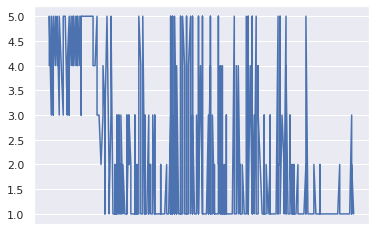

In [57]:
plt.plot(const_user.Timestamp, const_user.Rating)
plt.xticks([])

In [59]:
dfMovies.columns

Index(['ItemID', 'movie title', 'ReleaseYear', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
dfMovies.melt(id_vars=["ItemID", "movie title", "ReleaseYear", "unknown"], 
        var_name="Date", 
        value_name="Value")

In [62]:
genres = pd.get_dummies(dfMovies[['Action',
       'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]).idxmax(1)


In [72]:
dfMovies[dfMovies.unknown == 1]

,ItemID,movie title,ReleaseYear,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1372,1373,Good Morning (1971),1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data_picked = dfMovies[["ItemID", "movie title", "ReleaseYear"]]
data_picked["genre"] = genres

/tmp/ipykernel_2606/2233355284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_picked["genre"] = genres


In [74]:
data_picked = data_picked.set_index("ItemID")

(array([   2.,   19.,   34.,   36.,   39.,   33.,   41.,   55.,   98.,
        1324.]),
 array([1922. , 1929.6, 1937.2, 1944.8, 1952.4, 1960. , 1967.6, 1975.2,
        1982.8, 1990.4, 1998. ]),
 <BarContainer object of 10 artists>)

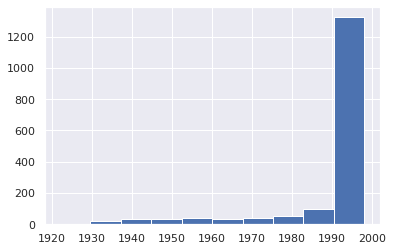

In [75]:
plt.hist(data_picked.ReleaseYear)

<AxesSubplot:>

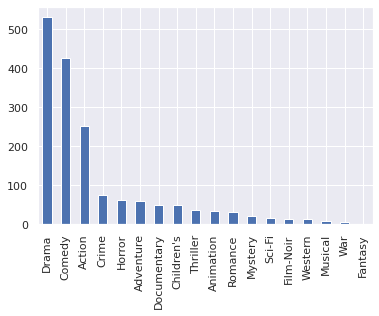

In [78]:
data_picked.genre.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='ReleaseYear'>

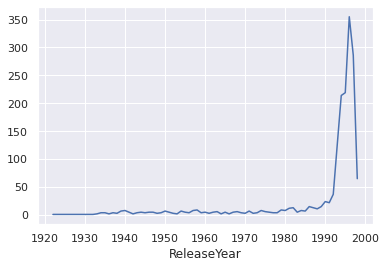

In [91]:
data_picked.groupby("ReleaseYear")["genre"].count().plot()

In [94]:
dfUsers = dfUsers.set_index("UserID")

In [101]:
df_ratings

,UserID,ItemID,Rating,Timestamp
0,186,302,3,1998-04-04 19:22:22
1,22,377,1,1997-11-07 07:18:36
2,244,51,2,1997-11-27 05:02:03
3,166,346,1,1998-02-02 05:33:16
4,298,474,4,1998-01-07 14:20:06
...,...,...,...,...
99994,880,476,3,1997-11-22 05:10:44
99995,716,204,5,1997-11-17 19:39:03
99996,276,1090,1,1997-09-20 22:49:55
99997,13,225,2,1997-12-17 22:52:36


In [103]:
merged_data = dfUsers.join(df_ratings)
merged_data = merged_data.join(data_picked)
merged_data

,Age,Gender,Occupation,Zip code,UserID,ItemID,Rating,Timestamp,movie title,ReleaseYear,genre
UserID,,,,,,,,,,,
1,24,M,technician,85711,22,377,1,1997-11-07 07:18:36,Toy Story (1995),1995.0,Animation
2,53,F,other,94043,244,51,2,1997-11-27 05:02:03,GoldenEye (1995),1995.0,Action
3,23,M,writer,32067,166,346,1,1998-02-02 05:33:16,Four Rooms (1995),1995.0,Thriller
4,24,M,technician,43537,298,474,4,1998-01-07 14:20:06,Get Shorty (1995),1995.0,Action
5,33,F,other,15213,115,265,2,1997-12-03 17:51:28,Copycat (1995),1995.0,Crime
...,...,...,...,...,...,...,...,...,...,...,...
939,26,F,student,33319,196,393,4,1997-12-04 16:11:03,Murder in the First (1995),1995.0,Drama
940,32,M,administrator,02215,56,91,4,1998-04-15 23:34:35,Airheads (1994),1994.0,Comedy
941,20,M,student,97229,82,477,3,1997-10-08 11:49:04,With Honors (1994),1994.0,Comedy


In [137]:
merged_data.Gender.value_counts()

670/(670+273)

0.7104984093319194

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

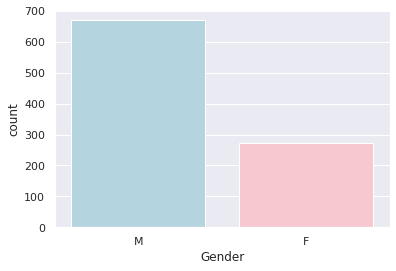

In [96]:
sns.countplot(dfUsers.Gender, palette=['lightblue','pink'])
#plt.show()

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


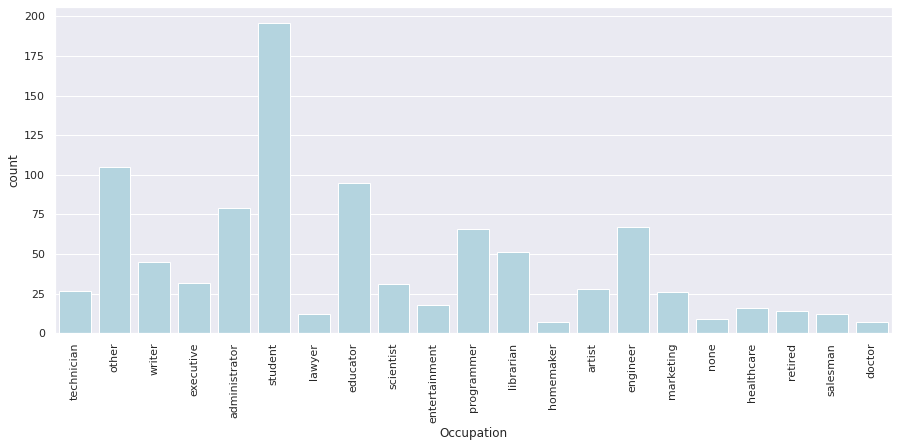

In [115]:
plt.figure(figsize=(15,6)) # Customizing to show the plot neatly

sns.countplot(dfUsers.Occupation, color= 'lightblue')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='genre,Gender'>

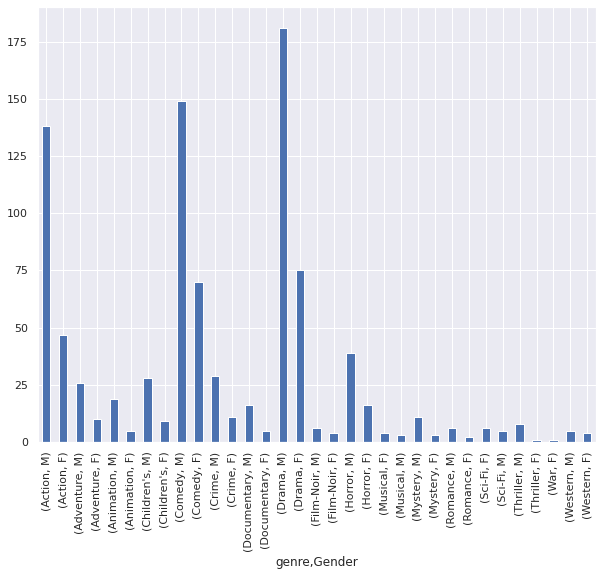

In [132]:
plt.figure(figsize=(10,8))
merged_data.groupby("genre")["Gender"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Rating,Gender'>

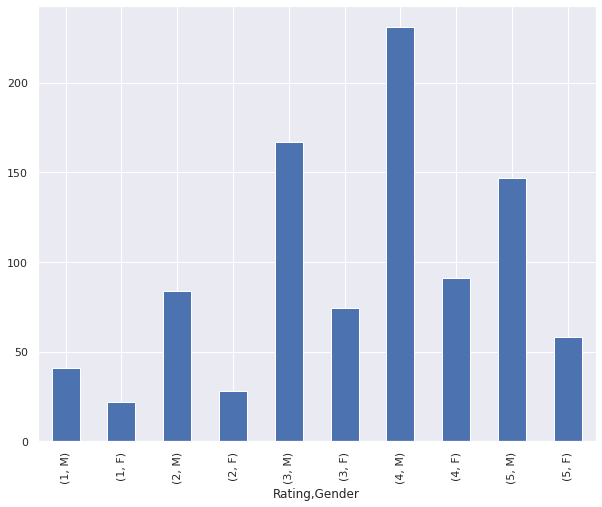

In [134]:
plt.figure(figsize=(10,8))
merged_data.groupby("Rating")["Gender"].value_counts().plot(kind="bar")

In [156]:
genre_gender_group = pd.DataFrame(merged_data.groupby(["genre", "Gender"])["Rating"].mean()).reset_index()

In [157]:
genre_gender_group

,genre,Gender,Rating
0,Action,F,3.510638
1,Action,M,3.572464
2,Adventure,F,3.300000
3,Adventure,M,3.307692
4,Animation,F,3.800000
5,Animation,M,3.473684
6,Children's,F,3.222222
7,Children's,M,3.428571
8,Comedy,F,3.371429
9,Comedy,M,3.644295


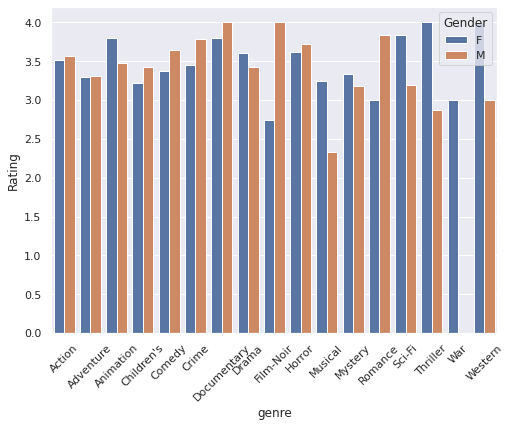

In [163]:
plt.figure(figsize=(8,6))
sns.barplot(x = genre_gender_group.genre, y=genre_gender_group.Rating, hue=genre_gender_group.Gender)
plt.xticks(rotation=45)
plt.show()

In [173]:
pd.DataFrame(merged_data[merged_data.Age > 40].groupby(["genre", "Gender"])["Rating"].mean())

Rating
genre       Gender          
Action      F       3.500000
            M       3.651163
Adventure   F       3.666667
            M       2.666667
Animation   F       3.500000
            M       4.000000
Children's  F       2.250000
            M       3.555556
Comedy      F       3.538462
            M       3.692308
Crime       F       4.000000
            M       3.500000
Documentary F       4.000000
            M       3.600000
Drama       F       3.625000
            M       3.385965
Film-Noir   F       4.000000
            M       3.750000
Horror      F       3.666667
            M       3.307692
Musical     F       2.500000
            M       2.000000
Mystery     M       3.000000
Romance     F       3.000000
            M       5.000000
Sci-Fi      M       4.000000

In [174]:
pd.DataFrame(merged_data[merged_data.Age < 40].groupby(["genre", "Gender"])["Rating"].mean())

Rating
genre       Gender          
Action      F       3.484848
            M       3.526882
Adventure   F       3.142857
            M       3.391304
Animation   F       4.000000
            M       3.444444
Children's  F       4.000000
            M       3.277778
Comedy      F       3.232558
            M       3.609524
Crime       F       3.142857
            M       3.909091
Documentary F       3.333333
            M       4.181818
Drama       F       3.607843
            M       3.434426
Film-Noir   F       2.333333
            M       4.500000
Horror      F       3.600000
            M       4.000000
Musical     F       4.000000
            M       2.500000
Mystery     F       3.333333
            M       3.285714
Romance     F       3.000000
            M       3.500000
Sci-Fi      F       3.833333
            M       2.000000
Thriller    F       4.000000
            M       2.875000
War         F       3.000000
Western     F       4.000000
            M       3.000000

In [175]:
merged_data

,Age,Gender,Occupation,Zip code,UserID,ItemID,Rating,Timestamp,movie title,ReleaseYear,genre
UserID,,,,,,,,,,,
1,24,M,technician,85711,22,377,1,1997-11-07 07:18:36,Toy Story (1995),1995.0,Animation
2,53,F,other,94043,244,51,2,1997-11-27 05:02:03,GoldenEye (1995),1995.0,Action
3,23,M,writer,32067,166,346,1,1998-02-02 05:33:16,Four Rooms (1995),1995.0,Thriller
4,24,M,technician,43537,298,474,4,1998-01-07 14:20:06,Get Shorty (1995),1995.0,Action
5,33,F,other,15213,115,265,2,1997-12-03 17:51:28,Copycat (1995),1995.0,Crime
...,...,...,...,...,...,...,...,...,...,...,...
939,26,F,student,33319,196,393,4,1997-12-04 16:11:03,Murder in the First (1995),1995.0,Drama
940,32,M,administrator,02215,56,91,4,1998-04-15 23:34:35,Airheads (1994),1994.0,Comedy
941,20,M,student,97229,82,477,3,1997-10-08 11:49:04,With Honors (1994),1994.0,Comedy
